In [7]:
pip install pydub


Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install soundfile

Note: you may need to restart the kernel to use updated packages.


In [18]:
!pip install --upgrade librosa

  Using cached librosa-0.10.2.post1-py3-none-any.whl (260 kB)
  Using cached numpy-1.20.3-cp39-cp39-win_amd64.whl (13.7 MB)


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\User\\AppData\\Local\\Temp\\pip-uninstall-sc3svh5o\\numpy\\core\\_multiarray_tests.cp39-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4


In [6]:
#Normalized without built-in
import numpy as np
import scipy.io.wavfile as wav

def normalize_audio(audio_data):
    # Calculate the maximum absolute amplitude
    max_amp = np.max(np.abs(audio_data))
    
    # Scale the audio data to have maximum absolute amplitude of 1
    normalized_audio = audio_data / max_amp
    
    return normalized_audio

def main():
    # Load audio file
    fs, audio_data = wav.read('newsample.wav')
    
    # Normalize the audio data
    normalized_audio = normalize_audio(audio_data)
    
    # Save normalized audio to file
    wav.write('newsample_out.wav', fs, normalized_audio.astype(np.float32))

if __name__ == "__main__":
    main()


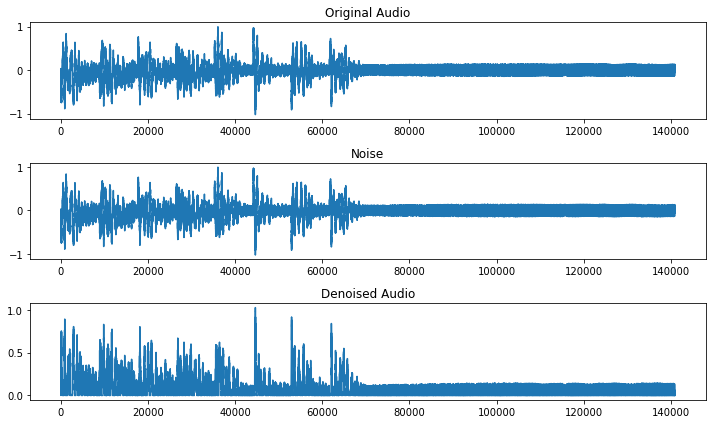

In [7]:
#noise remove
import numpy as np
import soundfile as sf
import matplotlib.pyplot as plt
def spectral_subtraction(audio, noise, alpha=2):
    # Perform spectral subtraction
    result = np.maximum(0, np.subtract(audio, alpha * noise))
    return result

# Load audio file and noise file
audio, sr_audio = sf.read('newsample_out.wav')
noise, sr_noise = sf.read('newsample_out.wav')

# Ensure both audio and noise have the same sample rate
if sr_audio != sr_noise:
    raise ValueError("Sample rates of audio and noise do not match.")

# Ensure noise has the same length as or shorter than audio
if len(noise) > len(audio):
    noise = noise[:len(audio)]
else:
    # If noise is shorter than audio, pad noise with zeros
    noise = np.pad(noise, (0, len(audio) - len(noise)), 'constant')

# Perform spectral subtraction
denoised_audio = spectral_subtraction(audio, noise)
plt.figure(figsize=(10, 6))

# Original audio
plt.subplot(3, 1, 1)
plt.plot(audio)
plt.title('Original Audio')

# Noise
plt.subplot(3, 1, 2)
plt.plot(noise)
plt.title('Noise')

# Denoised audio
plt.subplot(3, 1, 3)
plt.plot(denoised_audio)
plt.title('Denoised Audio')

plt.tight_layout()
plt.show()

# Save the denoised audio to a new file
output_path = 'music_out.wav'
sf.write(output_path, denoised_audio, sr_audio)


In [8]:
#Trimming Audio file
from pydub import AudioSegment

def trim_audio(input_file, output_file, start_ms, end_ms):
    # Load the audio file
    audio = AudioSegment.from_file(input_file)
    
    # Trim the audio
    trimmed_audio = audio[start_ms:end_ms]
    
    # Export the trimmed audio to a new file
    trimmed_audio.export(output_file, format="wav")

def main():
    # Input audio file path
    input_file = 'music_out.wav'
    
    # Output audio file path
    output_file = 'trimDemo.wav'
    
    # Start and end times in milliseconds (adjust as needed)
    start_ms = 10000  # Start time (10 seconds)
    end_ms = 40000    # End time (30 seconds)
    
    # Trim the audio
    trim_audio(input_file, output_file, start_ms, end_ms)
    
    print("Trimming completed!")

if __name__ == "__main__":
    main()

Trimming completed!


In [9]:
#segmentation

from pydub import AudioSegment
import os

def segment_audio(input_path, output_dir, segment_length_ms):
    audio = AudioSegment.from_file(input_path)
    # Ensure output directory exists
    os.makedirs(output_dir, exist_ok=True)
    # Segment audio into fixed-length segments
    for i, start_time in enumerate(range(0, len(audio), segment_length_ms)):
        segment = audio[start_time:start_time+segment_length_ms]
        segment.export(os.path.join(output_dir, f"segment_{i}.wav"), format="wav")
# Example usage:
input_path =  'trimDemo.wav'
output_dir =  'segmentDemo.wav'
segment_length_ms = 5000  # 5 seconds

segment_audio(input_path, output_dir, segment_length_ms)


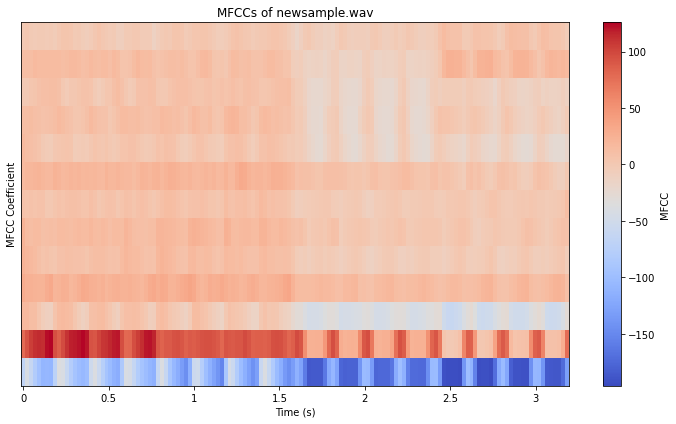

In [10]:
#MFCC

import librosa
import librosa.display
import matplotlib.pyplot as plt

def plot_mfcc(audio_file, n_mfcc=13):
    """
    Plot the MFCCs of an audio file.

    Parameters:
        audio_file (str): Path to the audio file.
        n_mfcc (int): Number of MFCC coefficients to compute.
    """
    # Load audio file
    y, sr = librosa.load(audio_file)

    # Compute MFCCs
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)

    # Plot MFCCs
    plt.figure(figsize=(10, 6))
    librosa.display.specshow(mfccs, sr=sr, x_axis='time')
    plt.colorbar(label='MFCC')
    plt.title('MFCCs of {}'.format(audio_file))
    plt.xlabel('Time (s)')
    plt.ylabel('MFCC Coefficient')
    plt.tight_layout()
    plt.show()

# Example usage:
audio_file = 'newsample.wav'
plot_mfcc(audio_file)

